In [54]:
# Imports

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

### Task 1

In [55]:
a = 0.0016
b = 0.2857
F = (5446392 + 6130690 + 6298958) / 100 #M
g = 9.81 #m/s^2
U_10 = 30 #m/s


U_a = 0.71 * U_10**1.23
F_hat = F * (g / U_a**2)


H_m0_hat = a * F_hat**0.5
H_m0 = H_m0_hat * U_a**2 / g


# Peak Wave Period

T_p_hat = b * F_hat**0.33
T_p = T_p_hat * U_a / g

# Regular Wave energy Flux

T_e = 1.1 * T_p
rho = 1025 #kg/m^3
P_wave_reg = rho * g**2 * H_m0**2 * T_e / (32 * np.pi) / 1000 #kW/m

# Irregular Wave energy Flux   

P_wave_irreg = rho * g**2 * H_m0**2 * T_p / (64 * np.pi) / 1000 #kW/m

print(f"H_mo: {round(H_m0, 2)} m")
print(f"T_p: {round(T_p, 2)} s")
print(f"P_wave_reg: {round(P_wave_reg, 2)} kW/m")
print(f"P_wave_irreg: {round(P_wave_irreg, 2)} kW/m")

H_mo: 10.06 m
T_p: 12.36 s
P_wave_reg: 1349.38 kW/m
P_wave_irreg: 613.35 kW/m


### Task 2

In [56]:
wave_data = pd.read_excel('WaveData_students11.xlsx', sheet_name='Sheet1')



# Mean of Hm0, Tp, P_wave_irreg
Hm0_mean = wave_data['Hm0 (m)'].mean()
Tp_mean = wave_data['Tp (sec)'].mean()


P_wave_irreg_list = []

for i in range(len(wave_data)):
    Hm0 = wave_data['Hm0 (m)'][i]
    Tp = wave_data['Tp (sec)'][i]
    P_wave_irreg = rho * g**2 * Hm0**2 * Tp / (64 * np.pi) / 1000 #kW/m
    P_wave_irreg_list.append(P_wave_irreg)


P_wave_irreg_mean = np.mean(P_wave_irreg_list)

# Standard Deviation of Hm0, Tp, P_wave_irreg
Hm0_std = wave_data['Hm0 (m)'].std()
Tp_std = wave_data['Tp (sec)'].std()

P_wave_irreg_std_list = []

for i in range(len(wave_data)):
    Hm0 = wave_data['Hm0 (m)'][i]
    Tp = wave_data['Tp (sec)'][i]
    P_wave_irreg = rho * g**2 * Hm0**2 * Tp / (64 * np.pi) / 1000 #kW/m
    P_wave_irreg_std_list.append(P_wave_irreg)

P_wave_irreg_std = np.std(P_wave_irreg_std_list)

# Max of Hm0, Tp, P_wave_irreg

Hm0_max = wave_data['Hm0 (m)'].max()
Tp_max = wave_data['Tp (sec)'].max()
P_wave_irreg_max = np.max(P_wave_irreg_list)


# Min of Hm0, Tp, P_wave_irreg
Hm0_min = wave_data['Hm0 (m)'].min()
Tp_min = wave_data['Tp (sec)'].min()
P_wave_irreg_min = np.min(P_wave_irreg_list)

print(f"Mean Hm0: {Hm0_mean:.2f} m")
print(f"Std Hm0: {Hm0_std:.2f} m")
print(f"Max Hm0: {Hm0_max:.2f} m")
print(f"Min Hm0: {Hm0_min:.2f} m\n")

print(f"Mean Tp: {Tp_mean:.2f} s")
print(f"Std Tp: {Tp_std:.2f} s")
print(f"Max Tp: {Tp_max:.2f} s")
print(f"Min Tp: {Tp_min:.2f} s\n")

print(f"Mean P_wave_irreg: {P_wave_irreg_mean:.2f} kW/m")
print(f"Std P_wave_irreg: {P_wave_irreg_std:.2f} kW/m")
print(f"Max P_wave_irreg: {P_wave_irreg_max:.2f} kW/m")
print(f"Min P_wave_irreg: {P_wave_irreg_min:.2f} kW/m")




Mean Hm0: 1.90 m
Std Hm0: 0.92 m
Max Hm0: 6.31 m
Min Hm0: 0.45 m

Mean Tp: 10.83 s
Std Tp: 2.84 s
Max Tp: 19.19 s
Min Tp: 3.14 s

Mean P_wave_irreg: 27.07 kW/m
Std P_wave_irreg: 34.93 kW/m
Max P_wave_irreg: 340.70 kW/m
Min P_wave_irreg: 0.60 kW/m


### Task 3

In [63]:
power_data = pd.read_excel('WaveData_students11.xlsx', sheet_name='Sheet2', skiprows=1, usecols=lambda col: col != 'Unnamed: 0')
display(power_data)

powers = []
tp_values = power_data.columns[1:].astype(float)
hm0_values = power_data.iloc[:, 0].values

for i in range(len(wave_data)):
    hm0 = wave_data['Hm0 (m)'][i]
    tp = wave_data['Tp (sec)'][i]
    # Find closest Hm0 and Tp in power_data
    hm0_idx = np.argmin(np.abs(hm0_values - hm0))
    tp_idx = np.argmin(np.abs(tp_values - tp))
    power = power_data.iloc[hm0_idx, tp_idx + 1]  # +1 because first column is Hm0
    powers.append(power)

total_power = sum(powers)


,Unnamed: 1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,6,11,19,25,30,44,50,53,44,34,22,20,17,0,0
3,1.5,0,0,0,0,13,25,43,55,68,90,102,92,91,66,65,65,45,0,0
4,2.0,0,0,0,0,24,45,65,100,121,153,175,151,122,126,87,61,58,0,0
5,2.5,0,0,0,0,0,65,104,141,191,179,243,255,190,181,135,99,83,0,0
6,3.0,0,0,0,0,0,96,137,205,244,357,293,353,260,248,184,137,120,0,0
7,3.5,0,0,0,0,0,0,192,254,291,431,385,424,324,285,239,222,172,0,0
8,4.0,0,0,0,0,0,0,256,366,403,551,536,531,473,420,289,268,179,0,0
9,4.5,0,0,0,0,0,0,327,418,574,678,708,665,509,415,386,244,249,0,0


In [83]:
print(f"Total Power: {total_power/1000:.2f} MWh")

installed_capacity = np.max(power_data.values)
capacity_factor = total_power / (installed_capacity * len(wave_data))


print(f"Capacity Factor: {capacity_factor*100:.2f} %")

Total Power: 1049.10 MWh
Capacity Factor: 11.98 %


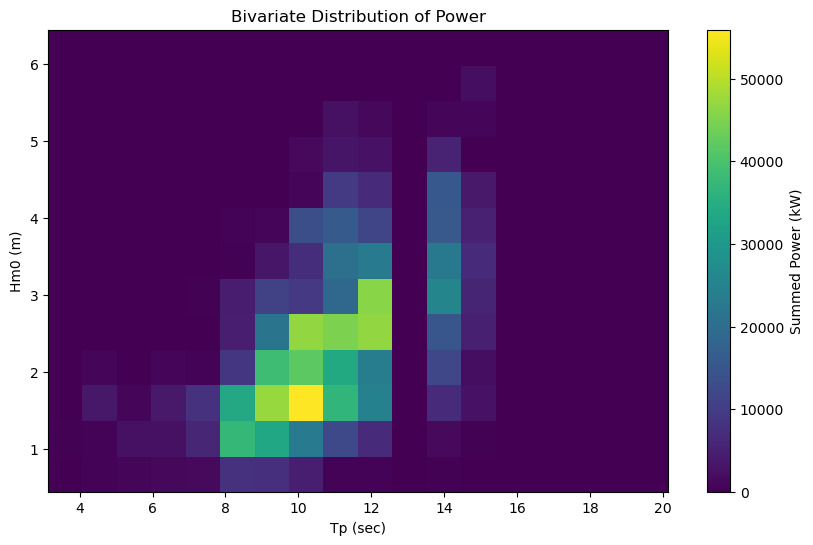

In [87]:
# Define bin edges for Hm0 and Tp
hm0_bins = np.arange(wave_data['Hm0 (m)'].min(), wave_data['Hm0 (m)'].max() + 0.5, 0.5)
tp_bins = np.arange(wave_data['Tp (sec)'].min(), wave_data['Tp (sec)'].max() + 1, 1)

# Digitize Hm0 and Tp values to get bin indices
hm0_bin_idx = np.digitize(wave_data['Hm0 (m)'], hm0_bins) - 1
tp_bin_idx = np.digitize(wave_data['Tp (sec)'], tp_bins) - 1

# Create a 2D array for binned power sums
bivariate_power = np.zeros((len(hm0_bins), len(tp_bins)))

# Fill the binned array with summed power
for i in range(len(wave_data)):
    h_idx = hm0_bin_idx[i]
    t_idx = tp_bin_idx[i]
    if 0 <= h_idx < len(hm0_bins) and 0 <= t_idx < len(tp_bins):
        bivariate_power[h_idx, t_idx] += powers[i]

# Optionally, plot the bivariate distribution
plt.figure(figsize=(10, 6))
plt.imshow(bivariate_power, origin='lower', aspect='auto',
           extent=[tp_bins[0], tp_bins[-1], hm0_bins[0], hm0_bins[-1]],
           cmap='viridis')
plt.colorbar(label='Summed Power (kW)')
plt.xlabel('Tp (sec)')
plt.ylabel('Hm0 (m)')
plt.title('Bivariate Distribution of Power')
plt.show()


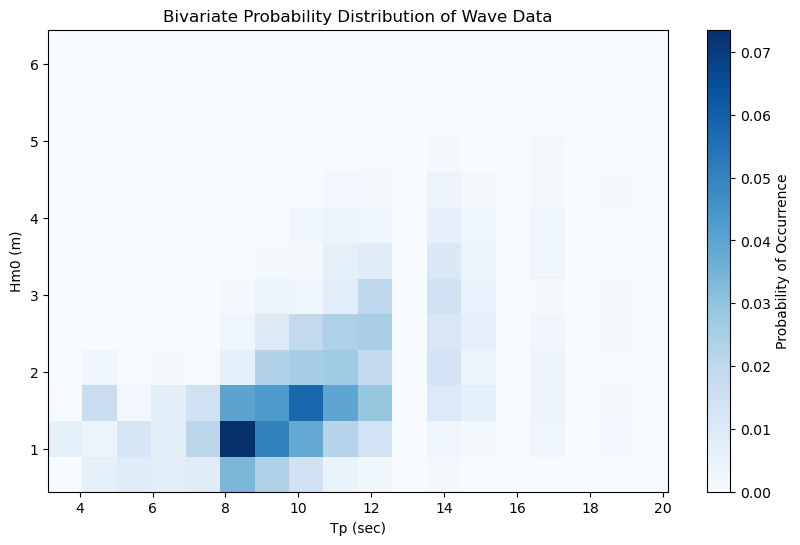

Sum of all probability values: 1.0000


In [ ]:
# Bin the wave_data into Hm0 and Tp bins
bin_counts = np.zeros((len(hm0_bins), len(tp_bins)))

for i in range(len(wave_data)):
    h_idx = hm0_bin_idx[i]
    t_idx = tp_bin_idx[i]
    if 0 <= h_idx < len(hm0_bins) and 0 <= t_idx < len(tp_bins):
        bin_counts[h_idx, t_idx] += 1

# Compute probability of occurrence for each bin
probability = bin_counts / np.sum(bin_counts)

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.imshow(probability, origin='lower', aspect='auto',
           extent=[tp_bins[0], tp_bins[-1], hm0_bins[0], hm0_bins[-1]],
           cmap='Blues')
plt.colorbar(label='Probability of Occurrence')
plt.xlabel('Tp (sec)')
plt.ylabel('Hm0 (m)')
plt.title('Bivariate Probability Distribution of Wave Data')
plt.show()


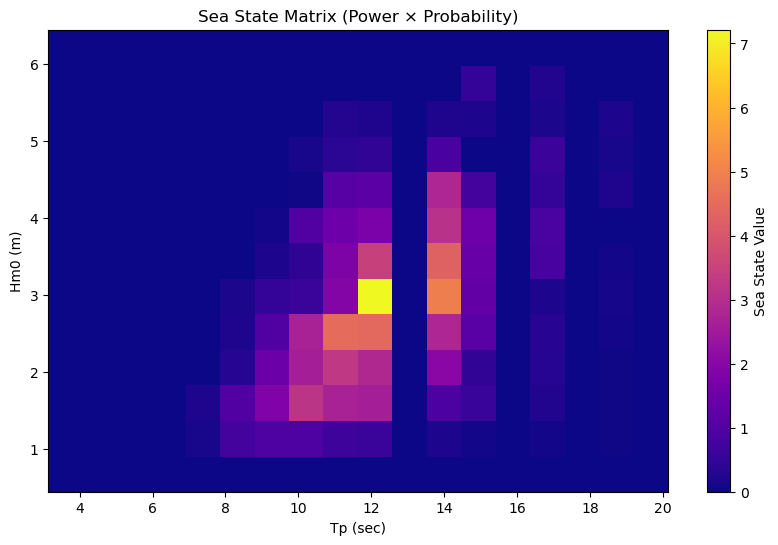

Total Sea State Power: 864707.42


In [109]:
# Multiply bivariate_power and probability to obtain the sea state matrix
# Ensure power_data is binned to match the shape of probability and bivariate_power
# Remove any extra header/column and use only the numeric part
power_matrix = power_data.iloc[1:len(hm0_bins)+1, 1:len(tp_bins)+1].values

# Multiply binned power and probability to get the sea state matrix
sea_state = power_matrix * probability

# Plot the sea state matrix
plt.figure(figsize=(10, 6))
plt.imshow(sea_state, origin='lower', aspect='auto',
           extent=[tp_bins[0], tp_bins[-1], hm0_bins[0], hm0_bins[-1]],
           cmap='plasma')
plt.colorbar(label='Sea State Value')
plt.xlabel('Tp (sec)')
plt.ylabel('Hm0 (m)')
plt.title('Sea State Matrix (Power × Probability)')
plt.show()

total_sea_state_power = np.sum(sea_state) * 8760  # Convert to MWh/year
print(f"Total Sea State Power: {total_sea_state_power:.2f}")

In [110]:
cf = total_sea_state_power / (installed_capacity * 8760)
print(f"Capacity Factor from Sea State Matrix: {cf*100:.2f} %")

Capacity Factor from Sea State Matrix: 9.87 %
